<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-10-22 21:31:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.7MB/s    in 2.8s    

2025-10-22 21:31:40 (54.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



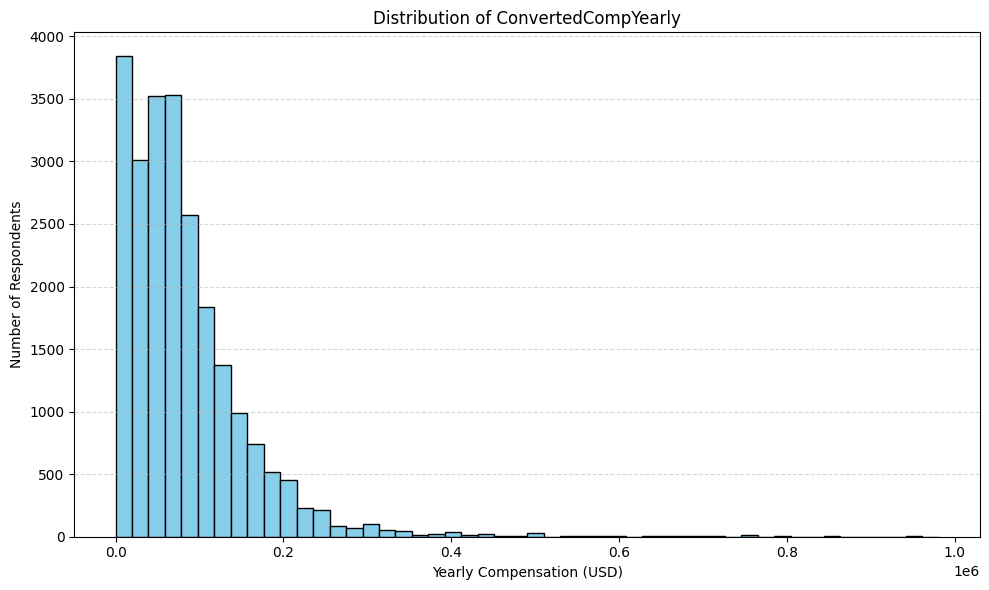

In [4]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columna de compensación ---
query = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Limpiar valores extremos o nulos ---
df = df[df['ConvertedCompYearly'] > 0]  # Eliminar valores <=0
df = df[df['ConvertedCompYearly'] < 1000000]  # Opcional: eliminar outliers extremos

# --- Graficar histograma ---
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of ConvertedCompYearly")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



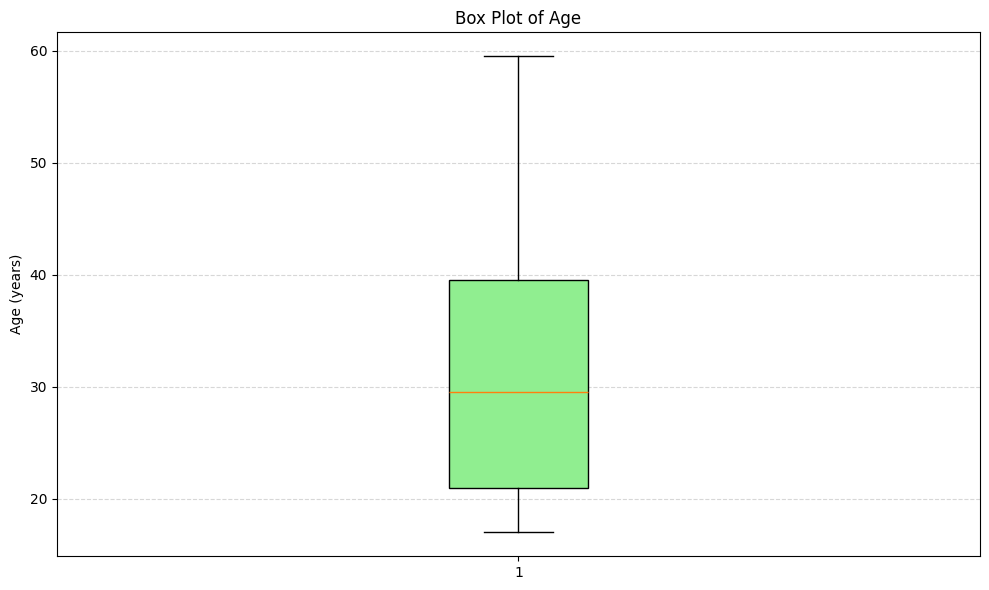

In [5]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columna Age ---
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)

# --- Convertir Age a valores numéricos ---
def convert_age(age):
    try:
        if 'Under' in age:
            return 17  # Asignamos un valor aproximado para "Under 18"
        elif 'Over' in age:
            return 65  # Asignamos un valor aproximado para "Over 65"
        elif '-' in age:
            parts = age.split('-')
            # Extraer los números y calcular promedio
            start = int(parts[0])
            end = int(''.join(filter(str.isdigit, parts[1])))
            return (start + end) / 2
        else:
            return None
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)
df = df.dropna(subset=['AgeNum'])

# --- Box plot ---
plt.figure(figsize=(10,6))
plt.boxplot(df['AgeNum'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Box Plot of Age")
plt.ylabel("Age (years)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



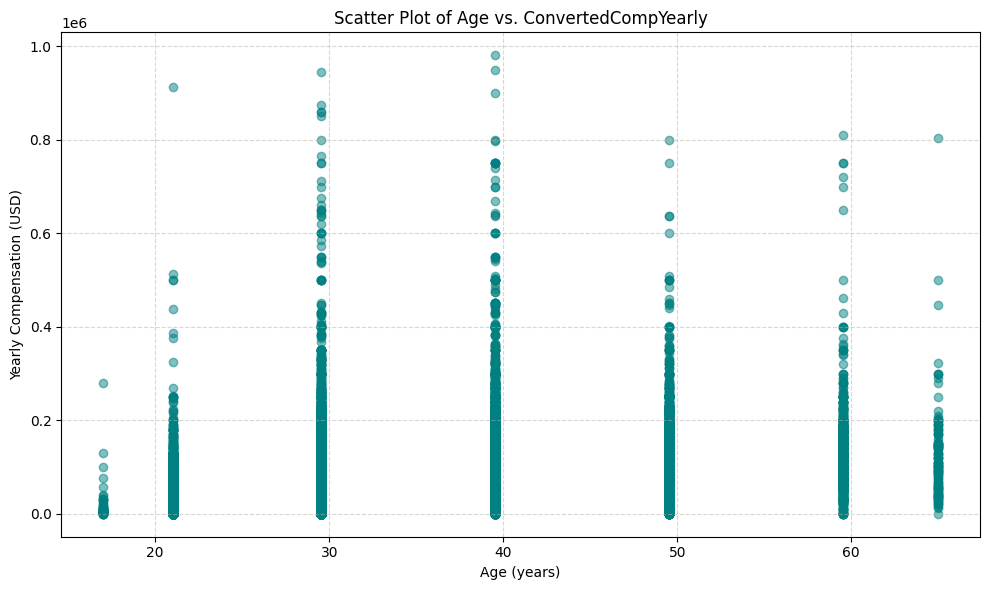

In [6]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas Age y ConvertedCompYearly ---
query = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir Age a valores numéricos ---
def convert_age(age):
    try:
        if 'Under' in age:
            return 17
        elif 'Over' in age or '65' in age:
            return 65
        elif '-' in age:
            parts = age.split('-')
            start = int(parts[0])
            end = int(''.join(filter(str.isdigit, parts[1])))
            return (start + end) / 2
        else:
            return None
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Filtrar valores nulos y compensaciones razonables ---
df = df.dropna(subset=['AgeNum', 'ConvertedCompYearly'])
df = df[(df['ConvertedCompYearly'] > 0) & (df['ConvertedCompYearly'] < 1000000)]

# --- Graficar scatter plot ---
plt.figure(figsize=(10,6))
plt.scatter(df['AgeNum'], df['ConvertedCompYearly'], alpha=0.5, color='teal')
plt.title("Scatter Plot of Age vs. ConvertedCompYearly")
plt.xlabel("Age (years)")
plt.ylabel("Yearly Compensation (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


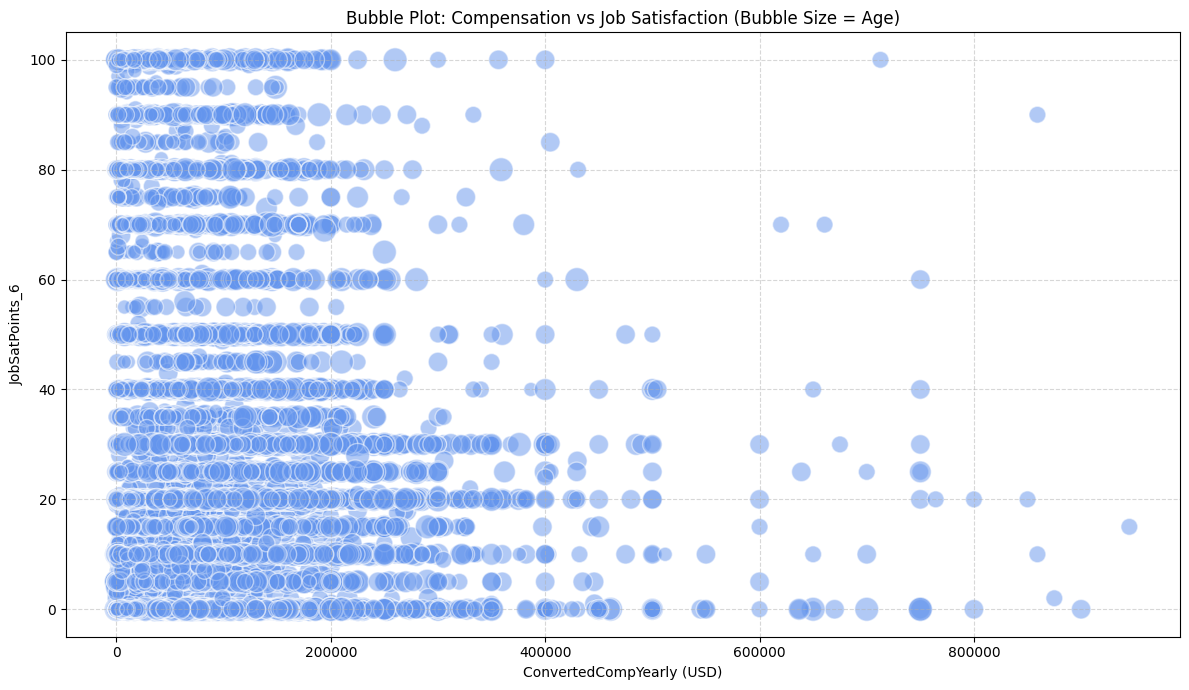

In [7]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir Age a valores numéricos ---
def convert_age(age):
    try:
        if 'Under' in age:
            return 17
        elif 'Over' in age or '65' in age:
            return 65
        elif '-' in age:
            parts = age.split('-')
            start = int(parts[0])
            end = int(''.join(filter(str.isdigit, parts[1])))
            return (start + end) / 2
        else:
            return None
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Filtrar valores válidos y compensaciones razonables ---
df = df.dropna(subset=['AgeNum', 'ConvertedCompYearly', 'JobSatPoints_6'])
df = df[(df['ConvertedCompYearly'] > 0) & (df['ConvertedCompYearly'] < 1000000)]

# --- Bubble plot ---
plt.figure(figsize=(12,7))
plt.scatter(
    df['ConvertedCompYearly'],
    df['JobSatPoints_6'],
    s=df['AgeNum']*5,  # Tamaño de burbuja proporcional a la edad
    alpha=0.5,
    color='cornflowerblue',
    edgecolors='w'
)
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.xlabel("ConvertedCompYearly (USD)")
plt.ylabel("JobSatPoints_6")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



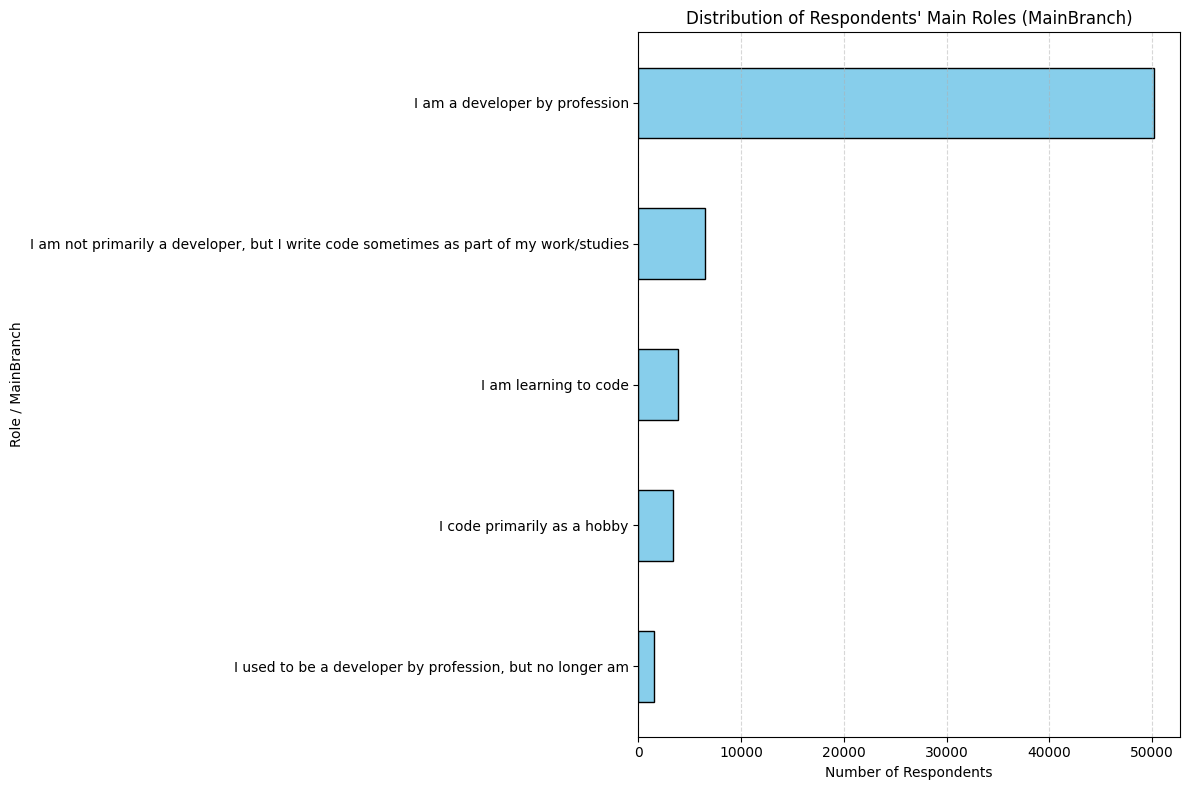

In [8]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columna MainBranch ---
query = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"
df = pd.read_sql_query(query, conn)

# --- Contar frecuencia de cada rol ---
role_counts = df['MainBranch'].value_counts()

# --- Graficar horizontal bar chart ---
plt.figure(figsize=(12,8))
role_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Distribution of Respondents' Main Roles (MainBranch)")
plt.xlabel("Number of Respondents")
plt.ylabel("Role / MainBranch")
plt.gca().invert_yaxis()  # Para que la barra más grande quede arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



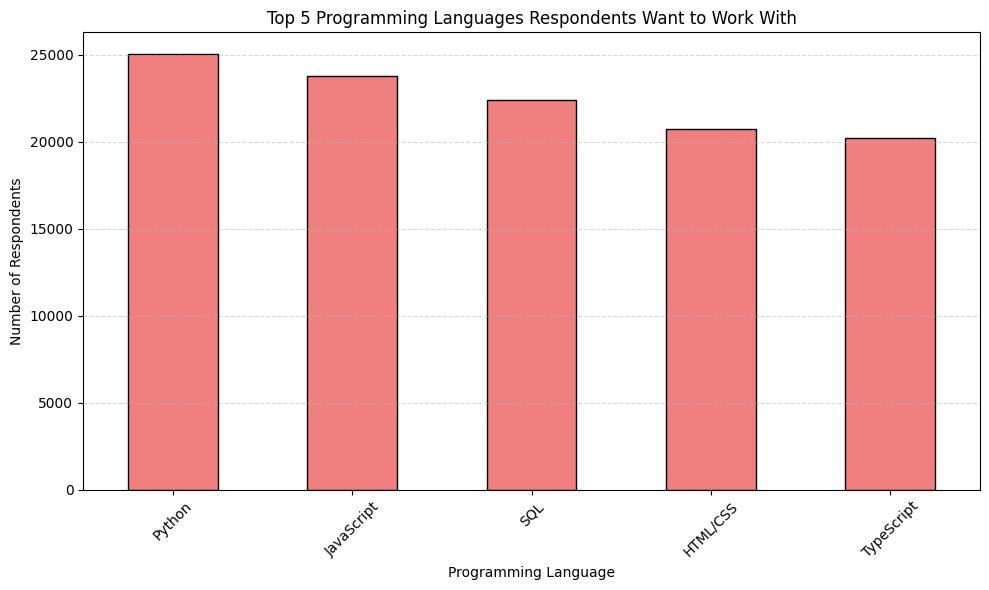

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columna LanguageWantToWorkWith ---
query = "SELECT LanguageWantToWorkWith FROM main WHERE LanguageWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)

# --- Separar los lenguajes en listas y contar frecuencia ---
df_exp = df.assign(Language=df["LanguageWantToWorkWith"].str.split(";")).explode("Language")
language_counts = df_exp['Language'].value_counts().head(5)

# --- Graficar vertical bar chart ---
plt.figure(figsize=(10,6))
language_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_1719/2029530480.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


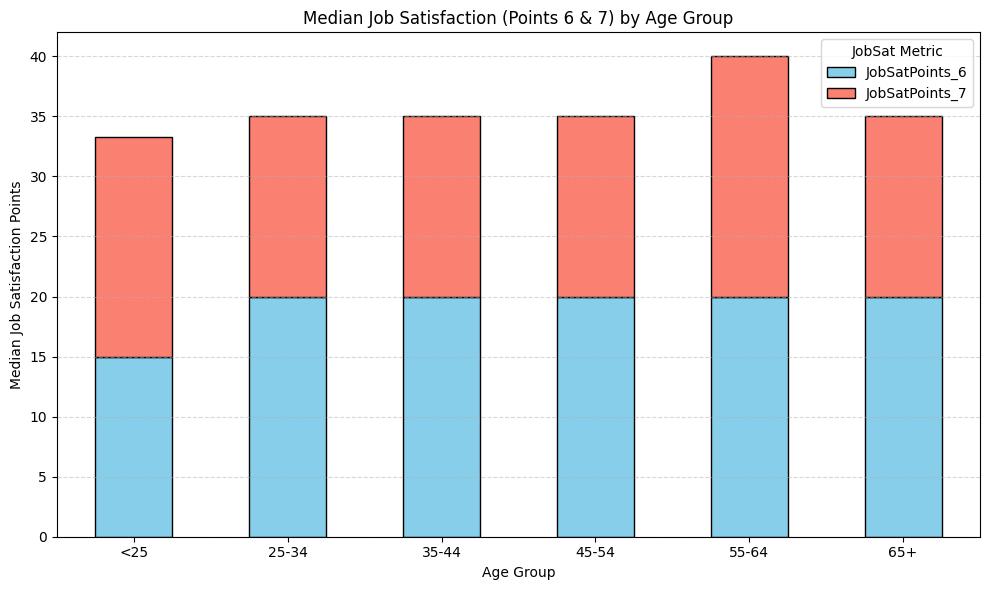

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir Age a valores numéricos ---
def convert_age(age):
    try:
        if 'Under' in age:
            return 17
        elif 'Over' in age or '65' in age:
            return 65
        elif '-' in age:
            parts = age.split('-')
            start = int(parts[0])
            end = int(''.join(filter(str.isdigit, parts[1])))
            return (start + end) / 2
        else:
            return None
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Definir grupos de edad ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels, right=True)

# --- Filtrar filas con valores válidos ---
df = df.dropna(subset=['AgeGroup', 'JobSatPoints_6', 'JobSatPoints_7'])

# --- Calcular medianas por grupo de edad ---
median_df = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# --- Graficar stacked bar chart ---
median_df.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue','salmon'], edgecolor='black')
plt.title("Median Job Satisfaction (Points 6 & 7) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Points")
plt.xticks(rotation=0)
plt.legend(title='JobSat Metric')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



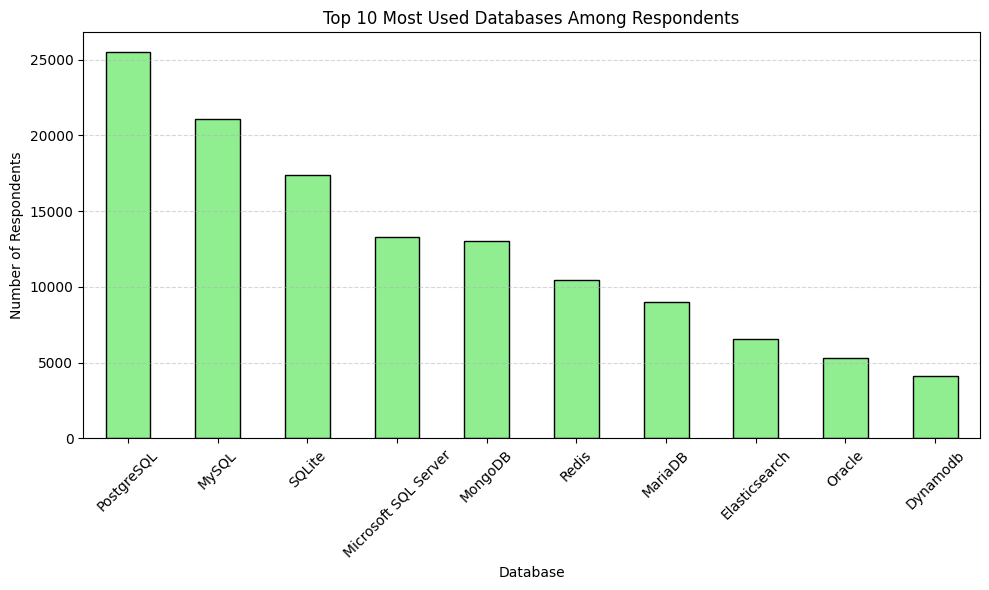

In [11]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columna DatabaseHaveWorkedWith ---
query = "SELECT DatabaseHaveWorkedWith FROM main WHERE DatabaseHaveWorkedWith IS NOT NULL"
df = pd.read_sql_query(query, conn)

# --- Separar bases de datos y contar frecuencia ---
df_exp = df.assign(Database=df["DatabaseHaveWorkedWith"].str.split(";")).explode("Database")
db_counts = df_exp['Database'].value_counts().head(10)  # Top 10 más populares

# --- Graficar vertical bar chart ---
plt.figure(figsize=(10,6))
db_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Most Used Databases Among Respondents")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
